<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [19]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
!pip install category_encoders
import category_encoders as ce
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [2]:
"""importing data"""
df = pd.read_csv('amesHousePrice.csv')
print(df.shape)
df.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
"""Viewing Nan Values"""
df.isnull().sum().sort_values(ascending=False)[:13]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
dtype: int64

In [4]:
"""Drop the columns with over 500 nan values"""
bad_columns = df.isnull().sum().sort_values(ascending=False)[:5].index.tolist()
# And remove the Id feature
bad_columns.append('Id')
data = df.drop(bad_columns, axis=1).copy()
data.head(12)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,0,0,0,0,0,1,2008,WD,Normal,118000


In [5]:
"""One hot encodeing and cleaning our data some more."""
encoder = ce.OneHotEncoder()
encoded = encoder.fit_transform(data)
drops1 = encoded.isnull().sum().sort_values(ascending=False)[:3].index.tolist()
drops1

['LotFrontage', 'GarageYrBlt', 'MasVnrArea']

In [6]:
data2 = encoded.drop(drops1, axis=1).copy()
data2.head(12)

,MSSubClass,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,MSZoning_5,LotArea,Street_1,Street_2,LotShape_1,...,SaleType_7,SaleType_8,SaleType_9,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4,SaleCondition_5,SaleCondition_6,SalePrice
0,60,1,0,0,0,0,8450,1,0,1,...,0,0,0,1,0,0,0,0,0,208500
1,20,1,0,0,0,0,9600,1,0,1,...,0,0,0,1,0,0,0,0,0,181500
2,60,1,0,0,0,0,11250,1,0,0,...,0,0,0,1,0,0,0,0,0,223500
3,70,1,0,0,0,0,9550,1,0,0,...,0,0,0,0,1,0,0,0,0,140000
4,60,1,0,0,0,0,14260,1,0,0,...,0,0,0,1,0,0,0,0,0,250000
5,50,1,0,0,0,0,14115,1,0,0,...,0,0,0,1,0,0,0,0,0,143000
6,20,1,0,0,0,0,10084,1,0,1,...,0,0,0,1,0,0,0,0,0,307000
7,60,1,0,0,0,0,10382,1,0,0,...,0,0,0,1,0,0,0,0,0,200000
8,50,0,1,0,0,0,6120,1,0,1,...,0,0,0,0,1,0,0,0,0,129900
9,190,1,0,0,0,0,7420,1,0,1,...,0,0,0,1,0,0,0,0,0,118000


In [8]:
data2_st = data2.describe()
data2_st.pop('SalePrice')
data2_st = data2_st.transpose()
data2_st

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.0,50.0,70.0,190.0
MSZoning_1,1460.0,0.788356,0.408614,0.0,1.0,1.0,1.0,1.0
MSZoning_2,1460.0,0.149315,0.356521,0.0,0.0,0.0,0.0,1.0
MSZoning_3,1460.0,0.006849,0.082505,0.0,0.0,0.0,0.0,1.0
MSZoning_4,1460.0,0.044521,0.206319,0.0,0.0,0.0,0.0,1.0
MSZoning_5,1460.0,0.010959,0.104145,0.0,0.0,0.0,0.0,1.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.5,9478.5,11601.5,215245.0
Street_1,1460.0,0.995890,0.063996,0.0,1.0,1.0,1.0,1.0
Street_2,1460.0,0.004110,0.063996,0.0,0.0,0.0,0.0,1.0
LotShape_1,1460.0,0.633562,0.481996,0.0,0.0,1.0,1.0,1.0


In [9]:
def norm(x):
  return (x - data2_st['mean']) / data2_st['std']
X = norm(data2.drop('SalePrice', axis=1)).values
y = data['SalePrice'].values
X.shape, y.shape

((1460, 278), (1460,))

In [10]:
"""Lets make a model"""

model = Sequential()
model.add(Dense(100, input_dim=278, activation='relu', name='In'))
model.add(Dense(100, activation='relu', name='2'))
model.add(Dense(100, activation='relu', name='3'))
model.add(Dense(100, activation='relu', name='4'))
model.add(Dense(1, name='Out'))

model.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['mse'])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
In (Dense)                   (None, 100)               27900     
_________________________________________________________________
2 (Dense)                    (None, 100)               10100     
_________________________________________________________________
3 (Dense)                    (None, 100)               10100     
_________________________________________________________________
4 (Dense)                    (None, 100)               10100     
_________________________________________________________________
Out (Dense)                  (None, 1)                 101       
Total params: 58,301
Trainable params: 58,301
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X,y, epochs=200, validation_split=.2, verbose=False)

In [13]:
vis_data = pd.DataFrame(history.history)
vis_data['epoch'] = history.epoch
vis_data

,loss,mean_squared_error,val_loss,val_mean_squared_error,epoch
0,3.876789e+10,3.876789e+10,3.950144e+10,3.950144e+10,0
1,3.207589e+10,3.207589e+10,2.004224e+10,2.004224e+10,1
2,9.112389e+09,9.112390e+09,7.374842e+09,7.374843e+09,2
3,3.398705e+09,3.398705e+09,4.458251e+09,4.458251e+09,3
4,1.881621e+09,1.881622e+09,3.672638e+09,3.672637e+09,4
5,1.480071e+09,1.480072e+09,3.307323e+09,3.307323e+09,5
6,1.233824e+09,1.233824e+09,3.068334e+09,3.068334e+09,6
7,1.060839e+09,1.060839e+09,2.880018e+09,2.880018e+09,7
8,9.213728e+08,9.213727e+08,2.741418e+09,2.741418e+09,8
9,8.248231e+08,8.248231e+08,2.709656e+09,2.709656e+09,9


AttributeError: module 'matplotlib.pyplot' has no attribute 'lineplot'

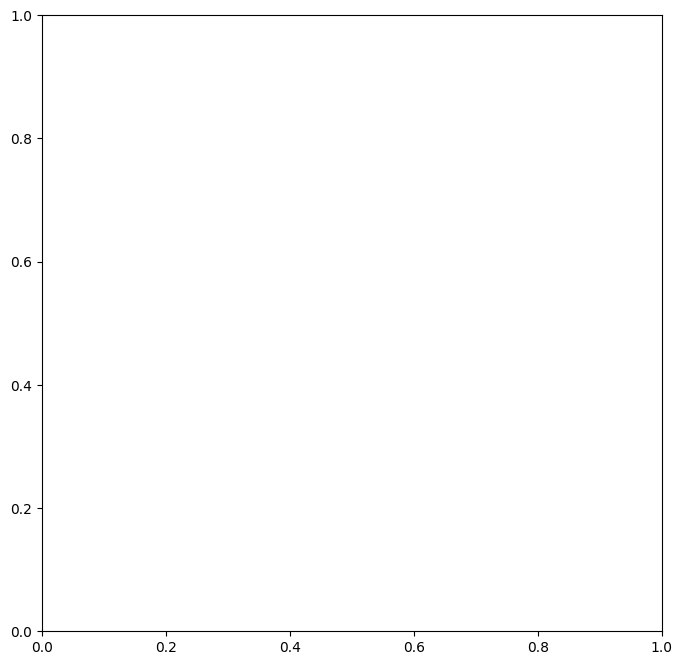

In [25]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(8,8))
    sns.lineplot(data=vis_data, x='epoch', y='mean_squared_error', label='Train MSE', alpha=.8)
    sns.lineplot(data=vis_data, x='epoch', y='val_mean_squared_error', label='Val MSE', alpha=.8)
    ax.set_ylabel('Mean Squared Error')

In [28]:
"""val_mae = to_plot['val_mae'].min()"""
val_mse = vis_data['val_mean_squared_error'].min()

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfr = RandomForestRegressor(n_jobs=-1, random_state=42, n_estimators=500)
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [30]:
y_pred = rfr.predict(X_test)

In [31]:
print('Using Random Forest Regressor: \n', f'MSE: ${mean_squared_error(y_pred, y_test):,.02f}')
print('Using Multilayer Perceptron Model: \n', f'MSE: ${val_mse:,.02f}')

Using Random Forest Regressor: 
 MSE: $803,226,762.19
Using Multilayer Perceptron Model: 
 MSE: $1,848,758,016.00


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [32]:
(X, y), (X_test, y_test) = fashion_mnist.load_data()

"""Normalize the Data"""
X = X / 255
y = to_categorical(y)
X.shape, y.shape

4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000, 10))

In [33]:
sampler = np.random.randint(60000, size=10000)
X = X[sampler]
y = y[sampler]
X.shape, y.shape

((10000, 28, 28), (10000, 10))

In [34]:
model = Sequential([
    Flatten(input_shape=(28,28), name='Flatten_Images'),
    Dense(100, activation='relu', name='In'),
    Dense(50, activation='relu', name='1'),
    Dense(10, activation='softmax', name='Out')
])
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'mae'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Flatten_Images (Flatten)     (None, 784)               0         
_________________________________________________________________
In (Dense)                   (None, 100)               78500     
_________________________________________________________________
1 (Dense)                    (None, 50)                5050      
_________________________________________________________________
Out (Dense)                  (None, 10)                510       
Total params: 84,060
Trainable params: 84,060
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(X,y, epochs=50, validation_split=.2, verbose=False)

AttributeError: module 'seaborn' has no attribute 'lineplot'

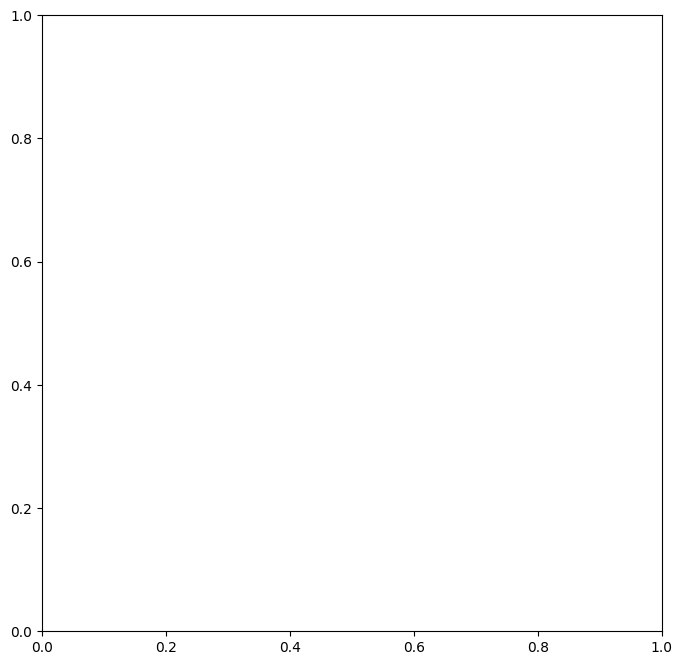

In [38]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(8,8))
    sns.lineplot(data=hist, x='epoch', y='val_accuracy', label='Validation Accuracy')
    sns.lineplot(data=hist, x='epoch', y='accuracy', label='Train Accuracy')
    ax.set_ylabel('Accuracy')
    ax.set_title('Accuracy over number of Epochs')

AttributeError: module 'seaborn' has no attribute 'lineplot'

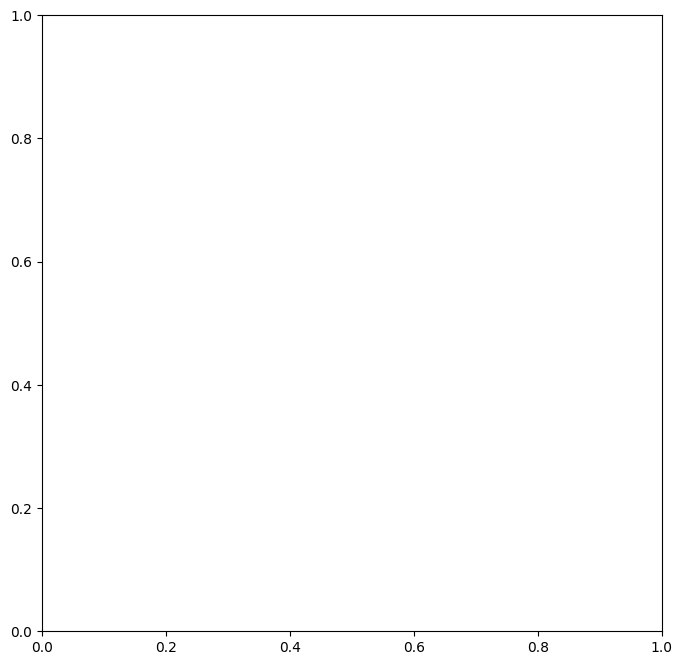

In [39]:
with plt.style.context('default'):
    fig, ax = plt.subplots(figsize=(8,8))
    sns.lineplot(data=hist, x='epoch', y='val_mae', label='Validation MAE')
    sns.lineplot(data=hist, x='epoch', y='mae', label='Train MAE')
    ax.set_title('Mean Absolute Error over number of Epochs')

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.